In [225]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_curve, roc_auc_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate, train_test_split, StratifiedKFold, GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from xgboost import XGBClassifier


In [203]:
path_db = '../db/filmes.db'

engine = create_engine(f'sqlite:///{path_db}')

In [204]:
df = pd.read_sql('SELECT * from filmes', con=engine)
df

,id,title,original_title,original_language,overview,budget,revenue,runtime,release_date,genres,popularity,vote_average,vote_count,num_genres,release_year
0,411405,Small Crimes,Small Crimes,en,"A disgraced former cop, fresh off a six-year p...",8.201666e+06,4.243626e+06,95.0,2017-04-28 00:00:00.000000,"['Drama', 'Comedy', 'Thriller', 'Crime']",7.219022,5.8,55.0,4,2017.0
1,42492,Up the Sandbox,Up the Sandbox,en,"A young wife and mother, bored with day-to-day...",3.543621e+05,2.978317e+06,97.0,1972-12-21 00:00:00.000000,"['Drama', 'Comedy']",0.138450,7.3,2.0,2,1972.0
2,12143,Bad Lieutenant,Bad Lieutenant,en,"While investigating a young nun's rape, a corr...",1.000000e+06,2.019469e+06,96.0,1992-09-16 00:00:00.000000,"['Crime', 'Drama']",6.417037,6.9,162.0,2,1992.0
3,9976,Satan's Little Helper,Satan's Little Helper,en,A naïve young boy unknowingly becomes the pawn...,1.890390e+06,1.710526e+06,100.0,2004-01-01 00:00:00.000000,"['Horror', 'Romance', 'Comedy']",2.233189,5.0,42.0,3,2004.0
4,46761,Sitcom,Sitcom,fr,The adventures of an upper-class suburban fami...,8.550376e+05,2.725346e+06,80.0,1998-05-27 00:00:00.000000,"['Comedy', 'Drama', 'Thriller']",1.800582,6.4,27.0,3,1998.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,3093,Basic Instinct 2,Basic Instinct 2,en,Novelist Catherine Tramell is once again in tr...,7.000000e+07,3.862948e+07,114.0,2006-03-29 00:00:00.000000,"['Crime', 'Mystery', 'Thriller']",15.321902,4.6,183.0,3,2006.0
4994,246127,Every Thing Will Be Fine,Every Thing Will Be Fine,en,"One day, driving aimlessly around the outskirt...",9.853274e+06,8.034000e+03,118.0,2015-04-02 00:00:00.000000,['Drama'],5.723103,5.3,79.0,1,2015.0
4995,9803,Seven Dwarfs,7 Zwerge - Männer allein im Wald,de,The Seven Dwarves live deep within a female-fr...,9.674091e+06,1.694475e+06,95.0,2004-10-28 00:00:00.000000,['Comedy'],4.582736,5.2,70.0,1,2004.0
4996,336970,True Siblings,Syskonsalt,sv,"The siblings Linus, 19-years-old, who are taki...",1.060106e+06,4.436564e+06,58.0,2000-09-13 00:00:00.000000,"['Drama', 'TV Movie']",2.364355,8.0,2.0,2,2000.0


In [205]:
df['sucesso'] = df.apply(lambda x: 1 if x['revenue'] > x['budget'] else 0, axis=1)
df

,id,title,original_title,original_language,overview,budget,revenue,runtime,release_date,genres,popularity,vote_average,vote_count,num_genres,release_year,sucesso
0,411405,Small Crimes,Small Crimes,en,"A disgraced former cop, fresh off a six-year p...",8.201666e+06,4.243626e+06,95.0,2017-04-28 00:00:00.000000,"['Drama', 'Comedy', 'Thriller', 'Crime']",7.219022,5.8,55.0,4,2017.0,0
1,42492,Up the Sandbox,Up the Sandbox,en,"A young wife and mother, bored with day-to-day...",3.543621e+05,2.978317e+06,97.0,1972-12-21 00:00:00.000000,"['Drama', 'Comedy']",0.138450,7.3,2.0,2,1972.0,1
2,12143,Bad Lieutenant,Bad Lieutenant,en,"While investigating a young nun's rape, a corr...",1.000000e+06,2.019469e+06,96.0,1992-09-16 00:00:00.000000,"['Crime', 'Drama']",6.417037,6.9,162.0,2,1992.0,1
3,9976,Satan's Little Helper,Satan's Little Helper,en,A naïve young boy unknowingly becomes the pawn...,1.890390e+06,1.710526e+06,100.0,2004-01-01 00:00:00.000000,"['Horror', 'Romance', 'Comedy']",2.233189,5.0,42.0,3,2004.0,0
4,46761,Sitcom,Sitcom,fr,The adventures of an upper-class suburban fami...,8.550376e+05,2.725346e+06,80.0,1998-05-27 00:00:00.000000,"['Comedy', 'Drama', 'Thriller']",1.800582,6.4,27.0,3,1998.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,3093,Basic Instinct 2,Basic Instinct 2,en,Novelist Catherine Tramell is once again in tr...,7.000000e+07,3.862948e+07,114.0,2006-03-29 00:00:00.000000,"['Crime', 'Mystery', 'Thriller']",15.321902,4.6,183.0,3,2006.0,0
4994,246127,Every Thing Will Be Fine,Every Thing Will Be Fine,en,"One day, driving aimlessly around the outskirt...",9.853274e+06,8.034000e+03,118.0,2015-04-02 00:00:00.000000,['Drama'],5.723103,5.3,79.0,1,2015.0,0
4995,9803,Seven Dwarfs,7 Zwerge - Männer allein im Wald,de,The Seven Dwarves live deep within a female-fr...,9.674091e+06,1.694475e+06,95.0,2004-10-28 00:00:00.000000,['Comedy'],4.582736,5.2,70.0,1,2004.0,0
4996,336970,True Siblings,Syskonsalt,sv,"The siblings Linus, 19-years-old, who are taki...",1.060106e+06,4.436564e+06,58.0,2000-09-13 00:00:00.000000,"['Drama', 'TV Movie']",2.364355,8.0,2.0,2,2000.0,1


In [206]:
df.columns

Index(['id', 'title', 'original_title', 'original_language', 'overview',
       'budget', 'revenue', 'runtime', 'release_date', 'genres', 'popularity',
       'vote_average', 'vote_count', 'num_genres', 'release_year', 'sucesso'],
      dtype='object')

In [207]:
features = ['budget', 'revenue', 'runtime', 'popularity', 'vote_average', 'vote_count', 'num_genres', 'release_year']

In [222]:
def modelo_arvore(df, features, coluna_alvo):
    
    valido = ~df[features].isna().any(axis=1) & (df[coluna_alvo] >= 0)
    
    X_valido = df.loc[valido, features].copy()
    y_valido = df.loc[valido, coluna_alvo].copy()
    
    X_train, X_test, y_train, y_test = train_test_split(X_valido, y_valido, test_size=0.2, random_state=42, stratify=y_valido)
    
    pipeline = Pipeline([('smote', SMOTE(random_state=42)), ('model', DecisionTreeClassifier())])
    
    param_grid = {
                'model__criterion': ['gini', 'entropy', 'log_loss'],
                'model__max_depth': [None, 5, 10, 20, 30],
                'model__min_samples_split': [2, 5, 10],
                'model__min_samples_leaf': [1, 2, 4],
                'smote__sampling_strategy': [0.5, 0.75, 1.0]
    }
    
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    grid_search_arvore = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        scoring='roc_auc',
        cv=skf,
        n_jobs=-1,
        verbose=2
    )
    
    grid_search_arvore.fit(X_train, y_train)
    
    print(f'Melhores parametros: {grid_search_arvore.best_params_}')
    print(f'Melhor AUC: {grid_search_arvore.best_score_}')
    
    best_model_arvore = grid_search_arvore.best_estimator_
    best_model_arvore.fit(X_train, y_train)
    
    y_pred = best_model_arvore.predict(X_test)
    
    print(classification_report(y_test, y_pred))
    
    y_pred_prob = best_model_arvore.predict_proba(X_test)[:,1]
    fp, vp, _ = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    
    plt.figure(figsize=(7,6))
    plt.plot(fp, vp, color='blue', label=f'AUC = {auc:.4f}')
    plt.plot([0,1],[0,1],color='gray',linestyle='--')
    plt.xlabel('Falsos Positivos')
    plt.ylabel('Verdadeiros Positivos')
    plt.title('Curva ROC: Árvore de Decisão')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()
    
    modelo_arvore = best_model_arvore.named_steps['model']
    plt.figure(figsize=(18,10))
    plot_tree(
        modelo_arvore,
        filled=True,
        feature_names=X_valido.columns,
        class_names=['Baixo Sucesso', 'Alto Sucesso'],
        rounded=True,
        fontsize=8        
    )
    
    plt.title('Arvore de Decisão')
    plt.show()
    
    return {'bm': best_model_arvore,
            'gs': grid_search_arvore}

Fitting 5 folds for each of 405 candidates, totalling 2025 fits
Melhores parametros: {'model__criterion': 'entropy', 'model__max_depth': 5, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'smote__sampling_strategy': 1.0}
Melhor AUC: 0.9815086797725288
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       259
           1       0.97      0.92      0.94       718

    accuracy                           0.92       977
   macro avg       0.88      0.92      0.90       977
weighted avg       0.93      0.92      0.92       977



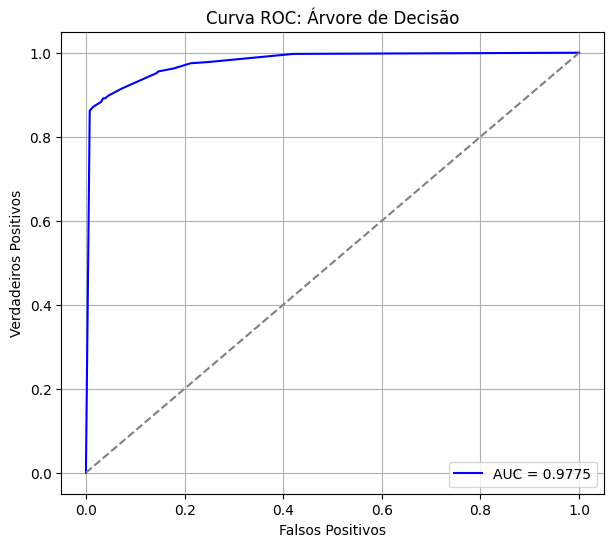

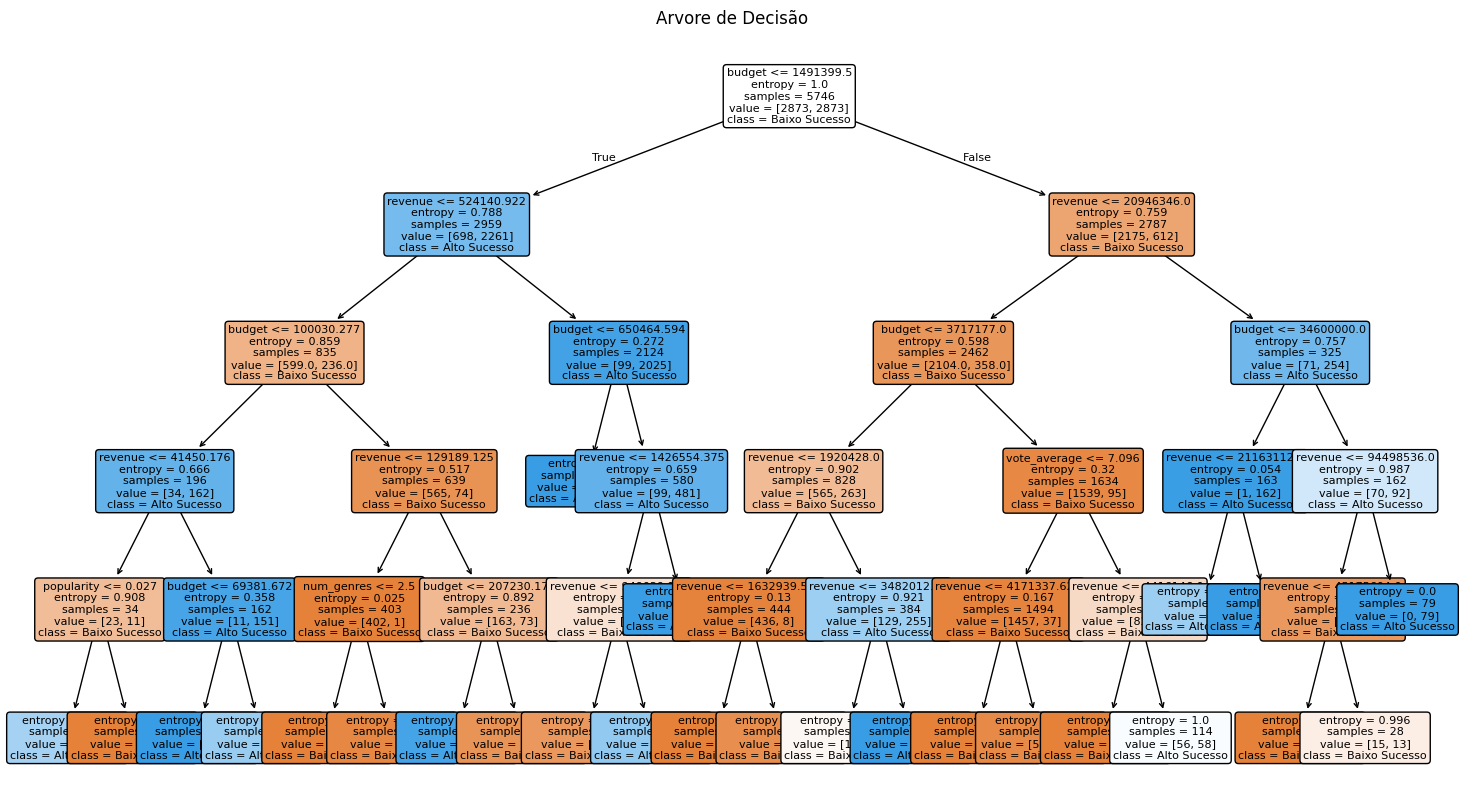

(Pipeline(steps=[('smote', SMOTE(random_state=42, sampling_strategy=1.0)),
                 ('model',
                  DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                         min_samples_leaf=2))]),
 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
              estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                        ('model', DecisionTreeClassifier())]),
              n_jobs=-1,
              param_grid={'model__criterion': ['gini', 'entropy', 'log_loss'],
                          'model__max_depth': [None, 5, 10, 20, 30],
                          'model__min_samples_leaf': [1, 2, 4],
                          'model__min_samples_split': [2, 5, 10],
                          'smote__sampling_strategy': [0.5, 0.75, 1.0]},
              scoring='roc_auc', verbose=2))

In [209]:
decision_tree = modelo_arvore(df, features, 'sucesso')
decision_tree

Ao treinar o modelo por __k-folds__ e vermos o seu desempenho, podemos perceber que o __AUC médio__ (melhor AUC) do treinamento é de aproximadamente `0.98` o que indica um bom desempenho do modelo. Além disso, quando o modelo final é treinado na divisão de treino (80%) e teste (20%), temos um AUC de `0.977` que mostra que o modelo generaliza bem para novos dados (situação real). 

Analizando a arvore de decisção no primeiro nó temos entropia igual a 1 o que significa impureza máxima e as classes estam igualmente misturadas. Com a regra feita na feature `budget` temos a primeira ramificação da ávore e conforme foram feitas as regras em `revenue` e `budget` podemos notar que a maioria das entropias diminuíram, diminuindo a impureza com __nós__ mais homogêneos até que na terceira divisão conseguimos o primeiro __nó folha__ com impureza mínima. 

Vamos avaliar no modelo de regressão logistica.

In [210]:
def modelo_logit(df, features, coluna_alvo):
    
    valido = ~df[features].isna().any(axis=1) & (df[coluna_alvo] >= 0)
    
    X = df.loc[valido, features].copy()
    y = df.loc[valido, coluna_alvo].copy()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    pipeline = Pipeline([('scaler', StandardScaler()), ('smote', SMOTE(random_state=42)), ('model', LogisticRegression(max_iter=1000 ,random_state=42))])
    
    param_grid = {
    'model__penalty': ['l2', 'l1', 'elasticnet'],
    'model__C': [0.01, 0.1, 1, 10, 100],
    'model__l1_ratio': [0, 0.5, 1],
    'model__solver': ['saga'],
    'smote__sampling_strategy': [0.5, 0.75, 1.0]
    }
    
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    grid_search_logit = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=skf,
    n_jobs=-1,
    verbose=2
    )
    
    grid_search_logit.fit(X_train, y_train)
    
    best_model_logit = grid_search_logit.best_estimator_
    best_model_logit.fit(X_train, y_train)
    
    y_pred = best_model_logit.predict(X_test)
    
    print(classification_report(y_test, y_pred))
    
    return {'bm': best_model_logit,
            'gs': grid_search_logit}

In [211]:
modelo_logistico = modelo_logit(df, features, 'sucesso')
modelo_logistico

Fitting 5 folds for each of 135 candidates, totalling 675 fits


c:\Users\Kleber\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\Kleber\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Kleber\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


              precision    recall  f1-score   support

           0       0.57      0.75      0.64       259
           1       0.90      0.79      0.84       718

    accuracy                           0.78       977
   macro avg       0.73      0.77      0.74       977
weighted avg       0.81      0.78      0.79       977



c:\Users\Kleber\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


{'bm': Pipeline(steps=[('scaler', StandardScaler()),
                 ('smote', SMOTE(random_state=42, sampling_strategy=1.0)),
                 ('model',
                  LogisticRegression(C=100, l1_ratio=0, max_iter=1000,
                                     penalty='l1', random_state=42,
                                     solver='saga'))]),
 'gs': GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
              estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                        ('smote', SMOTE(random_state=42)),
                                        ('model',
                                         LogisticRegression(max_iter=1000,
                                                            random_state=42))]),
              n_jobs=-1,
              param_grid={'model__C': [0.01, 0.1, 1, 10, 100],
                          'model__l1_ratio': [0, 0.5, 1],
                          'model__penalty': ['l2', 'l1', 'elasticnet']

Comparando os modelos de arvore de decisão e regressão logistica no `f1_score` vemos que o modelo de arvore de decisão tem um melhor desempenho na previsão de novos dados com `f1_score` de `0.92` e consequentemente `precisão` e `revocação` mais altas.

Agora vamos avaliar o modelo de Florestas aleatórias nesse dataset que é um ensemble de árvores de decisão.

In [212]:
def modelo_floresta_aleatoria(df, features, coluna_alvo):
    
    valido = ~df[features].isna().any(axis=1) & (df[coluna_alvo] >= 0)
    
    X_valido = df.loc[valido, features].copy()
    y_valido = df.loc[valido, coluna_alvo].copy()
    
    X_train, X_test, y_train, y_test = train_test_split(X_valido, y_valido, test_size=0.2, random_state=42, stratify=y_valido)
    
    pipeline = Pipeline([('smote', SMOTE(random_state=42)), ('model', RandomForestClassifier(n_estimators=200, random_state=42))])
    
    param_grid = {
                'model__criterion': ['gini', 'entropy', 'log_loss'],
                'model__max_depth': [None, 5, 10, 20, 30],
                'model__min_samples_split': [2, 5, 10],
                'model__min_samples_leaf': [1, 2, 4],
                'smote__sampling_strategy': [0.5, 0.75, 1.0]
    }
    
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    grid_search_forest = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        scoring='roc_auc',
        cv=skf,
        n_jobs=-1,
        verbose=2
    )
    
    grid_search_forest.fit(X_train, y_train)
    
    print(f'Melhores parametros: {grid_search_forest.best_params_}')
    print(f'Melhor AUC: {grid_search_forest.best_score_}')
    
    best_model_forest = grid_search_forest.best_estimator_
    best_model_forest.fit(X_train, y_train)
    
    y_pred = best_model_forest.predict(X_test)
    
    print(classification_report(y_test, y_pred))
    
    y_pred_prob = best_model_forest.predict_proba(X_test)[:,1]
    fp, vp, _ = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    
    plt.figure(figsize=(7,6))
    plt.plot(fp, vp, color='blue', label=f'AUC = {auc:.4f}')
    plt.plot([0,1],[0,1],color='gray',linestyle='--')
    plt.xlabel('Falsos Positivos')
    plt.ylabel('Verdadeiros Positivos')
    plt.title('Curva ROC: Árvore de Decisão')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()
    
    return {'bm': best_model_forest,
            'gs': grid_search_forest}

Fitting 5 folds for each of 405 candidates, totalling 2025 fits
Melhores parametros: {'model__criterion': 'entropy', 'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 5, 'smote__sampling_strategy': 0.75}
Melhor AUC: 0.9946084553223532
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       259
           1       0.97      0.98      0.98       718

    accuracy                           0.96       977
   macro avg       0.96      0.95      0.95       977
weighted avg       0.96      0.96      0.96       977



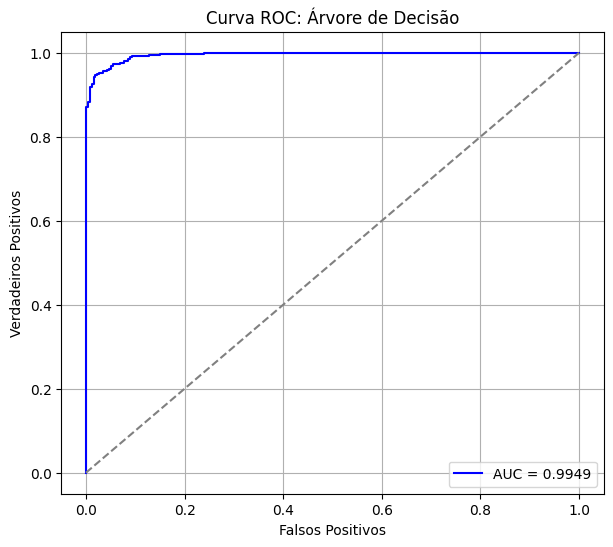

{'bm': Pipeline(steps=[('smote', SMOTE(random_state=42, sampling_strategy=0.75)),
                 ('model',
                  RandomForestClassifier(criterion='entropy',
                                         min_samples_split=5, n_estimators=200,
                                         random_state=42))]),
 'gs': GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
              estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                        ('model',
                                         RandomForestClassifier(n_estimators=200,
                                                                random_state=42))]),
              n_jobs=-1,
              param_grid={'model__criterion': ['gini', 'entropy', 'log_loss'],
                          'model__max_depth': [None, 5, 10, 20, 30],
                          'model__min_samples_leaf': [1, 2, 4],
                          'model__min_samples_split': [2, 5, 10],
         

In [213]:
modelo_random_forest = modelo_floresta_aleatoria(df, features, 'sucesso')
modelo_random_forest

Como podemos ver, tivemos uma melhora no modelo ensemble de florestas aleatórias tanto com a média do AUC de k-folds quando o AUC do treino final cujos valores de ambos são `0.995`. Além disso, conseguimos perceber que a curva ROC está mais delocada para o canto superior esquerdo do gráfico, o que confirma o melhor desempenho.

In [214]:
def modelo_XGBoost(df, features, coluna_alvo):
    
    valido = ~df[features].isna().any(axis=1) & (df[coluna_alvo] >= 0)
    
    X_valido = df.loc[valido, features].copy()
    y_valido = df.loc[valido, coluna_alvo].copy()
    
    X_train, X_test, y_train, y_test = train_test_split(X_valido, y_valido, test_size=0.2, random_state=42, stratify=y_valido)
    
    pipeline = Pipeline([('smote', SMOTE(random_state=42)), ('model', XGBClassifier())])
    
    param_grid = {
    'model__max_depth': [3, 5, 8, 10],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__n_estimators': [100, 200],
    'model__subsample': [0.8, 1.0],
    'model__colsample_bytree': [0.8, 1.0],
    'smote__sampling_strategy': [0.5, 0.75, 1.0]
    }
    
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    grid_search_xgboost = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        scoring='roc_auc',
        cv=skf,
        n_jobs=-1,
        verbose=2
    )
    
    grid_search_xgboost.fit(X_train, y_train)
    
    print(f'Melhores parametros: {grid_search_xgboost.best_params_}')
    print(f'Melhor AUC: {grid_search_xgboost.best_score_}')
    
    best_model_forest = grid_search_xgboost.best_estimator_
    best_model_forest.fit(X_train, y_train)
    
    y_pred = best_model_forest.predict(X_test)
    
    print(classification_report(y_test, y_pred))
    
    y_pred_prob = best_model_forest.predict_proba(X_test)[:,1]
    fp, vp, _ = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    
    plt.figure(figsize=(7,6))
    plt.plot(fp, vp, color='blue', label=f'AUC = {auc:.4f}')
    plt.plot([0,1],[0,1],color='gray',linestyle='--')
    plt.xlabel('Falsos Positivos')
    plt.ylabel('Verdadeiros Positivos')
    plt.title('Curva ROC: Árvore de Decisão')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()
    
    return {'bm': best_model_forest,
            'gs': grid_search_xgboost}

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Melhores parametros: {'model__colsample_bytree': 1.0, 'model__learning_rate': 0.2, 'model__max_depth': 8, 'model__n_estimators': 100, 'model__subsample': 0.8, 'smote__sampling_strategy': 0.5}
Melhor AUC: 0.9990894543133928
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       259
           1       0.98      0.99      0.99       718

    accuracy                           0.98       977
   macro avg       0.98      0.97      0.97       977
weighted avg       0.98      0.98      0.98       977



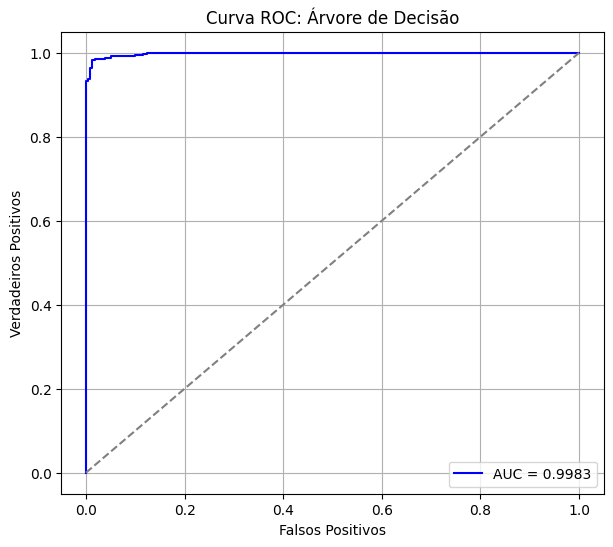

{'bm': Pipeline(steps=[('smote', SMOTE(random_state=42, sampling_strategy=0.5)),
                 ('model',
                  XGBClassifier(base_score=None, booster=None, callbacks=None,
                                colsample_bylevel=None, colsample_bynode=None,
                                colsample_bytree=1.0, device=None,
                                early_stopping_rounds=None,
                                enable_categorical=False, eval_metric=None,
                                feature_types=None, feature_weights=None,
                                gamma=None, grow_policy=None,
                                importance_type=None,
                                interaction_constraints=None, learning_rate=0.2,
                                max_bin=None, max_cat_threshold=None,
                                max_cat_to_onehot=None, max_delta_step=None,
                                max_depth=8, max_leaves=None,
                                min_child_weight=No

In [215]:
xgboost = modelo_XGBoost(df, features, 'sucesso')
xgboost

Vemos, portanto, que o modelo XGBoost teve um melhor desempenho dos demais modelos com AUC médio dos k-folds `0.999` e AUC no treino final de `0.998`. Além disso, a curva ROC está deslocada mais ainda para o canto superior esquerdo do gráfico. 

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Melhores parametros: {'model__colsample_bytree': 1.0, 'model__learning_rate': 0.2, 'model__max_depth': 8, 'model__n_estimators': 100, 'model__subsample': 0.8, 'smote__sampling_strategy': 0.5}
Melhor AUC: 0.9990894543133928
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       259
           1       0.98      0.99      0.99       718

    accuracy                           0.98       977
   macro avg       0.98      0.97      0.97       977
weighted avg       0.98      0.98      0.98       977



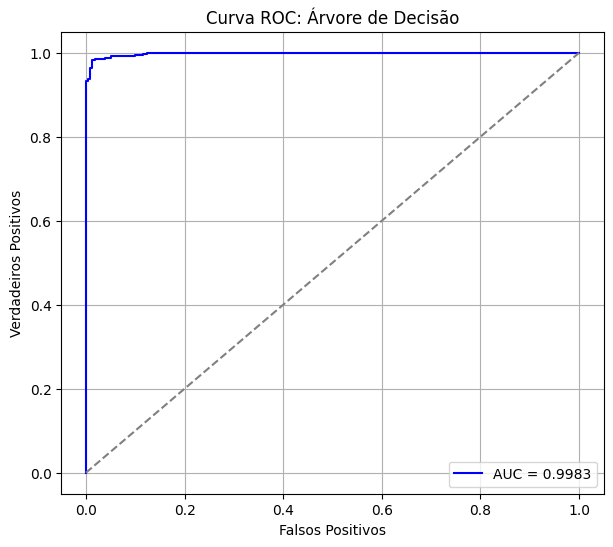

        feature  importance
0        budget    0.394772
1       revenue    0.360844
4  vote_average    0.157919
3    popularity    0.029428
2       runtime    0.019345
6    num_genres    0.014680
5    vote_count    0.012165
7  release_year    0.010847


In [216]:
modelo_treinado = modelo_XGBoost(df, features, 'sucesso')['bm']

xgb_model = modelo_treinado.named_steps['model']
importancias = xgb_model.feature_importances_

importancia_df = pd.DataFrame({
    'feature': features,
    'importance': importancias
}).sort_values('importance', ascending=False)

print(importancia_df)

Percebemos que `budget` é a feature que atribui mais importancia para `sucesso` seguido de `revenue` e `vote_average`. O restante tem pouco impacto.

Agora vamos calcular a média dos scores do modelo de Florestas Aleatórias.

Fitting 5 folds for each of 405 candidates, totalling 2025 fits
Melhores parametros: {'model__criterion': 'entropy', 'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 5, 'smote__sampling_strategy': 0.75}
Melhor AUC: 0.9946084553223532
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       259
           1       0.97      0.98      0.98       718

    accuracy                           0.96       977
   macro avg       0.96      0.95      0.95       977
weighted avg       0.96      0.96      0.96       977



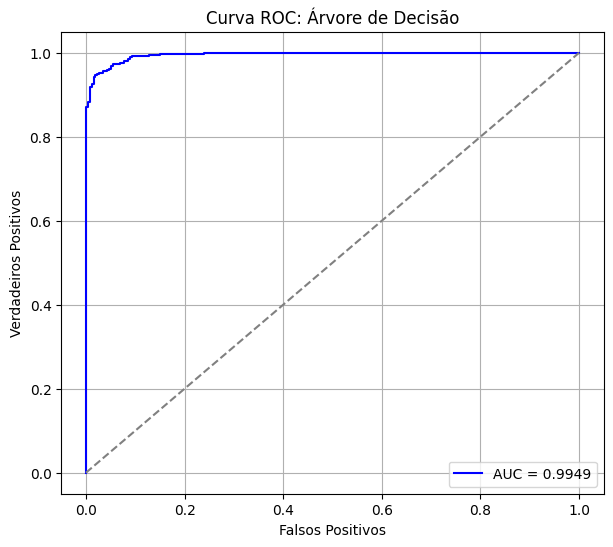

In [217]:
resultados_grid = modelo_floresta_aleatoria(df, features, 'sucesso')['gs']

In [218]:
resultados_cv = resultados_grid.cv_results_

mean_scores = resultados_cv['mean_test_score']
std_scores = resultados_cv['std_test_score']

var_scores = std_scores ** 2

best_var = var_scores[resultados_grid.best_index_]

print(f'Variância dos AUCs do melhor modelo com 5-folds: {best_var:.6f}')

Variância dos AUCs do melhor modelo com 5-folds: 0.000004


Isso indica que o modelo de Florestas aleatórias é __estável__ pois a variancia dos AUCs é bem baixa `0.000004` nos 5 folds que possuem desempenho parecido.

Fitting 5 folds for each of 135 candidates, totalling 675 fits


c:\Users\Kleber\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\Kleber\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Kleber\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\Kleber\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


              precision    recall  f1-score   support

           0       0.57      0.75      0.64       259
           1       0.90      0.79      0.84       718

    accuracy                           0.78       977
   macro avg       0.73      0.77      0.74       977
weighted avg       0.81      0.78      0.79       977

Fitting 5 folds for each of 405 candidates, totalling 2025 fits
Melhores parametros: {'model__criterion': 'entropy', 'model__max_depth': 5, 'model__min_samples_leaf': 2, 'model__min_samples_split': 10, 'smote__sampling_strategy': 1.0}
Melhor AUC: 0.9815086797725288
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       259
           1       0.97      0.92      0.94       718

    accuracy                           0.92       977
   macro avg       0.88      0.92      0.90       977
weighted avg       0.93      0.92      0.92       977



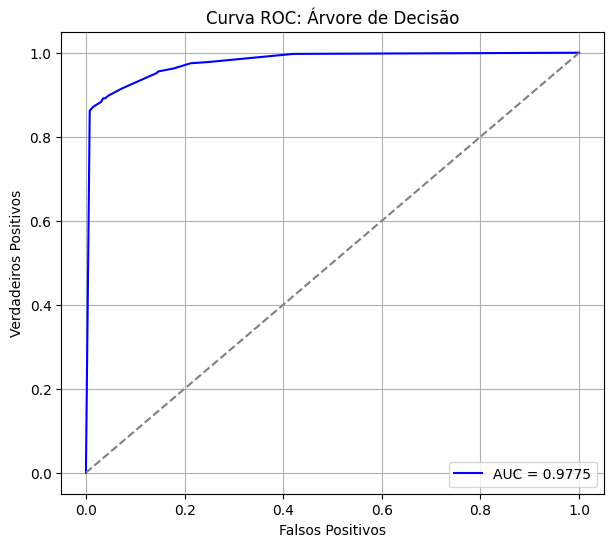

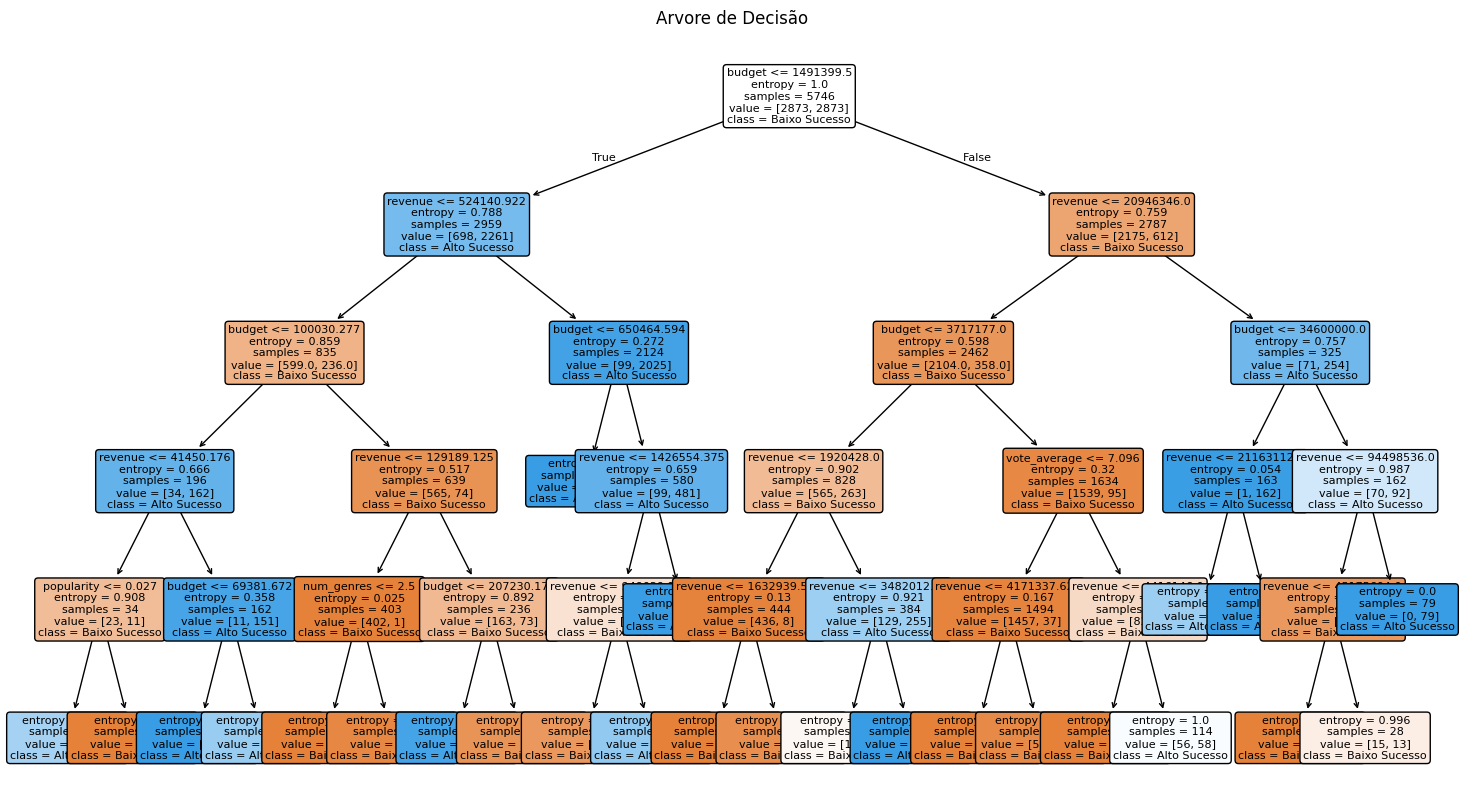

Fitting 5 folds for each of 405 candidates, totalling 2025 fits
Melhores parametros: {'model__criterion': 'entropy', 'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 5, 'smote__sampling_strategy': 0.75}
Melhor AUC: 0.9946084553223532
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       259
           1       0.97      0.98      0.98       718

    accuracy                           0.96       977
   macro avg       0.96      0.95      0.95       977
weighted avg       0.96      0.96      0.96       977



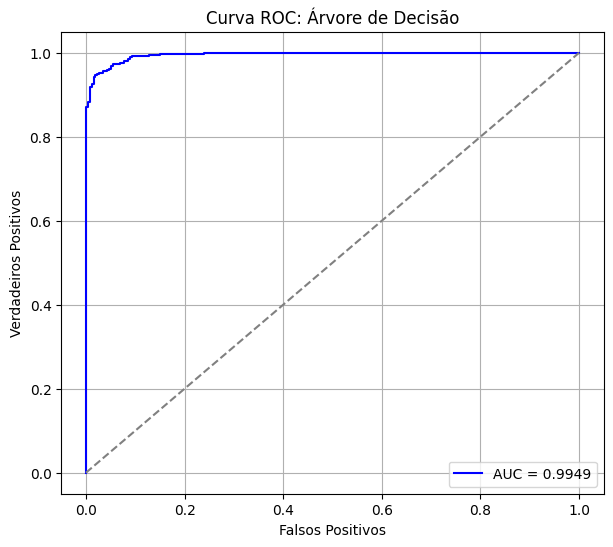

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Melhores parametros: {'model__colsample_bytree': 1.0, 'model__learning_rate': 0.2, 'model__max_depth': 8, 'model__n_estimators': 100, 'model__subsample': 0.8, 'smote__sampling_strategy': 0.5}
Melhor AUC: 0.9990894543133928
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       259
           1       0.98      0.99      0.99       718

    accuracy                           0.98       977
   macro avg       0.98      0.97      0.97       977
weighted avg       0.98      0.98      0.98       977



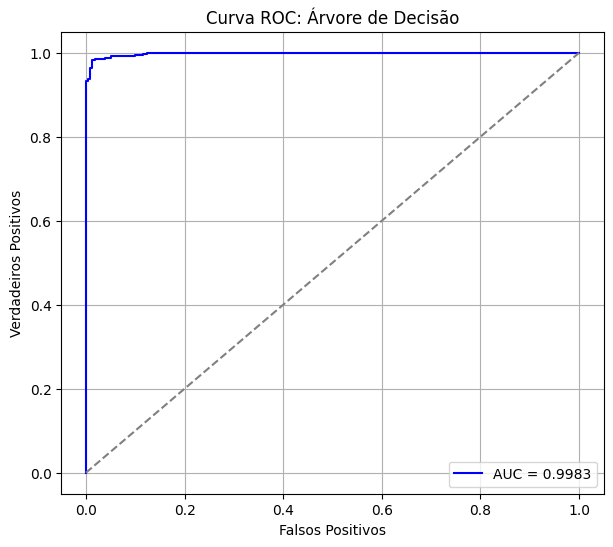

,Modelo,AUC médio
0,modelo_logit,0.874842
1,modelo_arvore,0.981509
2,modelo_random_forest,0.994608
3,modelo_XGBoost,0.999089


In [223]:
resultado_logit = modelo_logit(df, features, 'sucesso')
resultado_arvore = modelo_arvore(df, features, 'sucesso')
resultado_floresta = modelo_floresta_aleatoria(df, features, 'sucesso')
resultado_XGBoost = modelo_XGBoost(df, features, 'sucesso')

aucs = {
        'modelo_logit': resultado_logit['gs'].best_score_,
        'modelo_arvore': resultado_arvore['gs'].best_score_,
        'modelo_random_forest': resultado_floresta['gs'].best_score_,
        'modelo_XGBoost': resultado_XGBoost['gs'].best_score_
}

df_auc = pd.DataFrame(list(aucs.items()), columns=['Modelo', 'AUC médio'])
df_auc

C:\Users\Kleber\AppData\Local\Temp\ipykernel_42312\2735161217.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Modelo', y='AUC médio', data=df_auc, palette='viridis')


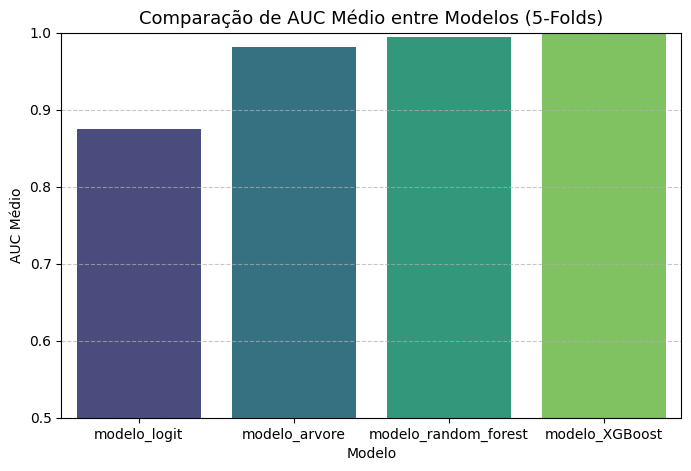

In [227]:
plt.figure(figsize=(8,5))
sns.barplot(x='Modelo', y='AUC médio', data=df_auc, palette='viridis')
plt.title('Comparação de AUC Médio entre Modelos (5-Folds)', fontsize=13)
plt.ylabel('AUC Médio')
plt.ylim(0.5, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()